Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
# import all neccessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
sns.set_theme(palette='rocket')

In [4]:
# loading the bike stations and yelp poi dataframes
bike_stations_data2 = pd.read_csv('../data/bike_stations_barcelona.csv', index_col=0)
yelp_poi = pd.read_csv('../data/bike_stations_barcelona_poi_yelp.csv', index_col=0)

# Rename bike_stations id column to match yelp_poi so they can be merged
bike_stations_data2 = bike_stations_data2.rename(columns={'id': 'station_id'})

In [5]:
# Checking the dimensions of each dataframe 
print(bike_stations_data2.shape)
print(yelp_poi.shape)

(507, 5)
(792, 6)


In [11]:
## Join data of both dataframes based on station id
full_df = pd.merge(bike_stations_data2, yelp_poi, how='outer', on='station_id')

full_df = full_df.rename(columns={'name_x': 'station_name', 'name_y': 'poi_name'})

full_df.head()

,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,rating,distance,full_address
0,13,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",oD9g3jw6UoebuiI3GtSGww,Tasca I Vins,4.0,191.557179,"['Calle Cardenal Tedeschini, 32', '08027 Barce..."
1,13,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",J1vHLZvSRfkNpy2x8OuVaQ,Torre Rosa,4.0,501.236274,"['Carrer de Francesc Tàrrega, 22', '08027 Barc..."
2,13,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",iRrsa0bQbTtHzBjsHIprqQ,Beering Barcelona,4.5,828.625543,"['Carrer de las Navas de Tolosa, 355', '08041 ..."
3,13,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",UdRmo2dstOYd29Ihs5vI8w,La Vermuteria de Sant Andreu,4.0,508.573281,"['Rambla de Fabra I Puig, 51', '08030 Barcelon..."
4,13,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",e6bRub-8J0j5PDm55UNASA,Toca Teca,4.5,395.734907,"['Carrer Garcilaso, 172', '08027 Barcelona', '..."


In [13]:
# Checking if above merging has worked
print('Diff of number of bike stations:', bike_stations_data2.shape[0] - len(full_df['station_id'].unique()))

print('Diff of number of POI:', yelp_poi.shape[0] - full_df.shape[0])

Diff of number of bike stations: 0
Diff of number of POI: -467


In [14]:
## Get more info of dataframe to do further investigation of merging data
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   free_bikes    1259 non-null   int64  
 1   station_id    1259 non-null   object 
 2   latitude      1259 non-null   float64
 3   longitude     1259 non-null   float64
 4   station_name  1259 non-null   object 
 5   poi_id        792 non-null    object 
 6   poi_name      792 non-null    object 
 7   rating        792 non-null    float64
 8   distance      792 non-null    float64
 9   full_address  792 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 98.5+ KB


In [15]:
# Identify the POI's that are null
full_df[full_df['poi_id'].isnull()]

,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,rating,distance,full_address
792,11,6627cf97075521a6295e0364ae4d4e7f,41.436671,2.186105,"C/ MALATS, 98-100",NaN,NaN,NaN,NaN,NaN
793,24,408725c15ad93ef162f0e92a0cfec7d1,41.403890,2.204114,"C/ LOPE DE VEGA, 79",NaN,NaN,NaN,NaN,NaN
794,7,9a7b57a18c273d1722a143bdefa072ce,41.403153,2.144584,"C/ SANT HERMENEGILD, 30",NaN,NaN,NaN,NaN,NaN
795,11,614fa4d6943058d43722dc81a0564c6c,41.439929,2.197069,"C/REPÚBLICA DOMINICANA,25(CENTRE COMERCIAL)",NaN,NaN,NaN,NaN,NaN
796,7,2aff2ad9ec4b1b84d6abd6492da2e4e6,41.393489,2.170742,"C/ BRUC, 66",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1254,24,9236b6b2cd0af13747bef6610bc2815c,41.425663,2.200863,"RAMBLA DE PRIM, 256",NaN,NaN,NaN,NaN,NaN
1255,1,3dc0ced3eb7d74f753eff203d02d79cd,41.411763,2.145342,"C/ ARGENTERA, 23",NaN,NaN,NaN,NaN,NaN
1256,8,f131c8be74d689e7349af47724d88348,41.380393,2.160651,"C/ COMTE URGELL, 23",NaN,NaN,NaN,NaN,NaN
1257,15,9197b4871b9c31693dd4f6f37b716a57,41.391429,2.180569,"PG. LLUIS COMPANYS, 18 (ARC TRIOMF)",NaN,NaN,NaN,NaN,NaN


In conclusion, the number of bike stations remain the same within both datasets and there is no difference in count. As for the points of interest, there are 467 fewer points of interest in one dataset, compared to the other.This difference could be due to missing or unmatched POI data in one of the datasets during the merging or comparison process.

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [16]:
full_df.head()

,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,rating,distance,full_address
0,13,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",oD9g3jw6UoebuiI3GtSGww,Tasca I Vins,4.0,191.557179,"['Calle Cardenal Tedeschini, 32', '08027 Barce..."
1,13,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",J1vHLZvSRfkNpy2x8OuVaQ,Torre Rosa,4.0,501.236274,"['Carrer de Francesc Tàrrega, 22', '08027 Barc..."
2,13,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",iRrsa0bQbTtHzBjsHIprqQ,Beering Barcelona,4.5,828.625543,"['Carrer de las Navas de Tolosa, 355', '08041 ..."
3,13,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",UdRmo2dstOYd29Ihs5vI8w,La Vermuteria de Sant Andreu,4.0,508.573281,"['Rambla de Fabra I Puig, 51', '08030 Barcelon..."
4,13,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",e6bRub-8J0j5PDm55UNASA,Toca Teca,4.5,395.734907,"['Carrer Garcilaso, 172', '08027 Barcelona', '..."


In [17]:
full_df.shape   

(1259, 10)

In [18]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   free_bikes    1259 non-null   int64  
 1   station_id    1259 non-null   object 
 2   latitude      1259 non-null   float64
 3   longitude     1259 non-null   float64
 4   station_name  1259 non-null   object 
 5   poi_id        792 non-null    object 
 6   poi_name      792 non-null    object 
 7   rating        792 non-null    float64
 8   distance      792 non-null    float64
 9   full_address  792 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 98.5+ KB


In [20]:
## Count the number of nulls in the rating column 
full_df['rating'].value_counts()

rating
4.5    333
4.0    241
5.0     98
3.5     64
3.0     39
2.5     12
1.0      4
1.5      1
Name: count, dtype: int64

In [21]:
# Fill all null values with a str category
full_df['rating'] = full_df['rating'].fillna('#')

# Convert the str category to number category
full_df['rating'] = full_df['rating'].astype('category').cat.codes

In [22]:
# Check the counts of each rating category
full_df['rating'].value_counts()

rating
8    467
6    333
5    241
7     98
4     64
3     39
2     12
0      4
1      1
Name: count, dtype: int64

In [23]:
# Investigating the rating rank from 1 to 5
full_df['rating'].value_counts() / len(full_df['rating'])

rating
8    0.370929
6    0.264496
5    0.191422
7    0.077840
4    0.050834
3    0.030977
2    0.009531
0    0.003177
1    0.000794
Name: count, dtype: float64

In [24]:
full_df.describe()

,free_bikes,latitude,longitude,rating,distance
count,1259.000000,1259.000000,1259.000000,1259.000000,7.920000e+02
mean,8.828435,41.404980,2.168141,6.372518,6.077067e+02
std,6.091965,0.023012,0.024926,1.544334,3.227770e+02
min,0.000000,41.346775,2.109154,0.000000,5.307630e-09
25%,4.000000,41.385603,2.147327,5.000000,3.283704e+02
50%,8.000000,41.405270,2.176399,6.000000,6.055726e+02
75%,13.000000,41.426925,2.187361,8.000000,8.719256e+02
max,37.000000,41.462095,2.220691,8.000000,1.345367e+03


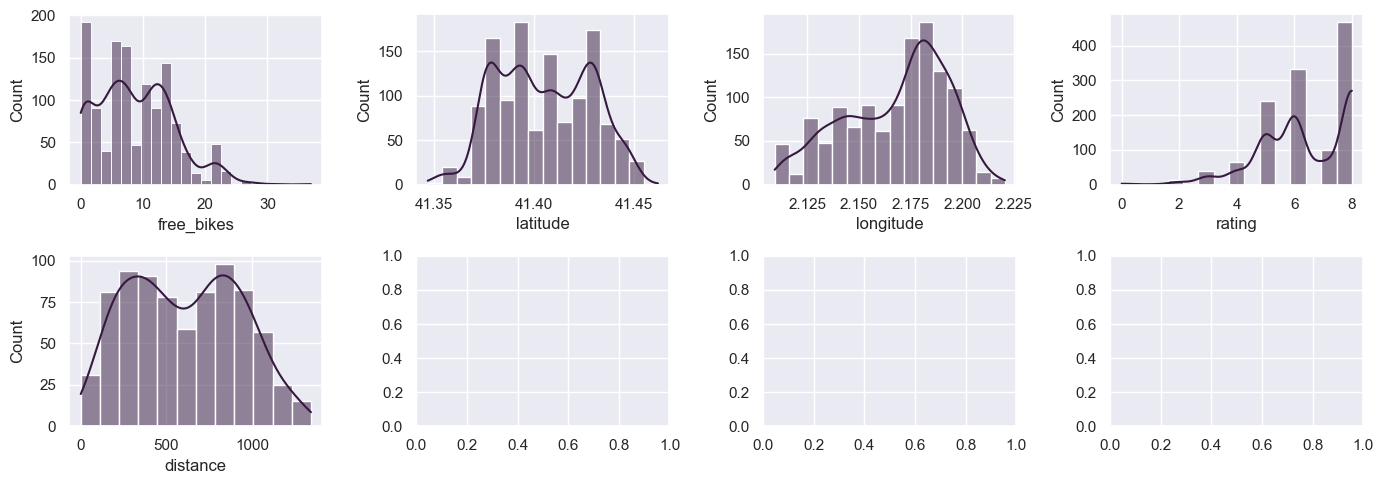

FileNotFoundError: [Errno 2] No such file or directory: '../images/full_df_histplt.png'

<Figure size 640x480 with 0 Axes>

In [30]:
## Creating a histogram plot for the above results 
fig, axes = plt.subplots(2, 4, figsize=(14, 5))

sns.histplot(ax=axes[0,0], data=full_df, x='free_bikes', kde=True)
sns.histplot(ax=axes[0,1], data=full_df, x='latitude', kde=True)
sns.histplot(ax=axes[0,2], data=full_df, x='longitude', kde=True)
sns.histplot(ax=axes[0,3], data=full_df, x='rating', kde=True)
sns.histplot(ax=axes[1,0], data=full_df, x='distance', kde=True)

fig.tight_layout()

plt.show()

plt.savefig('../images/full_df_histplt.png')

## Above plot was saved as png ## 

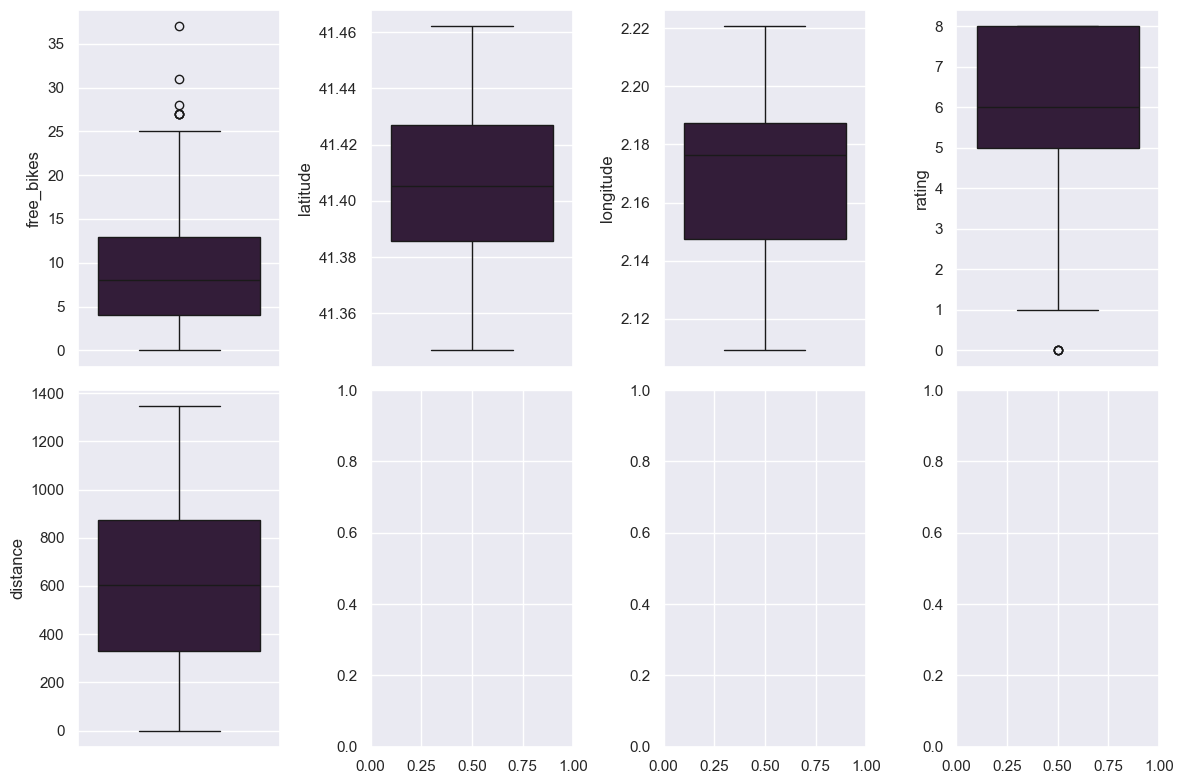

FileNotFoundError: [Errno 2] No such file or directory: '../images/full_df_boxplot.svg'

In [31]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))


sns.boxplot(ax=axes[0, 0], data=full_df, y='free_bikes')
sns.boxplot(ax=axes[0, 1], data=full_df, y='latitude')
sns.boxplot(ax=axes[0, 2], data=full_df, y='longitude')
sns.boxplot(ax=axes[0, 3], data=full_df, y='rating')
sns.boxplot(ax=axes[1, 0], data=full_df, y='distance')

plt.tight_layout()

plt.show()

fig.savefig('../images/full_df_boxplot.svg')

FileNotFoundError: [Errno 2] No such file or directory: '../images/full_df_heatmap.svg'

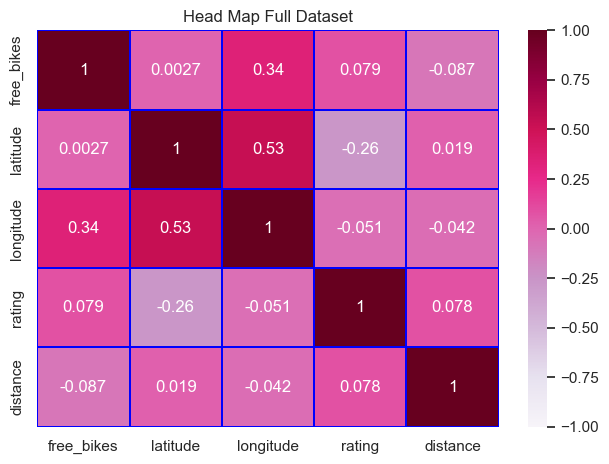

In [33]:
## Creating heatmap on full_df dataset
ax = sns.heatmap(full_df.select_dtypes(exclude=[object]).corr(), vmin=-1, vmax=1, cmap='PuRd', annot=True, linewidth=.1, linecolor="blue")
ax.set(title='Head Map Full Dataset')

plt.tight_layout()

plt.savefig('../images/full_df_heatmap.svg')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../images/full_df_pairgrid.svg'

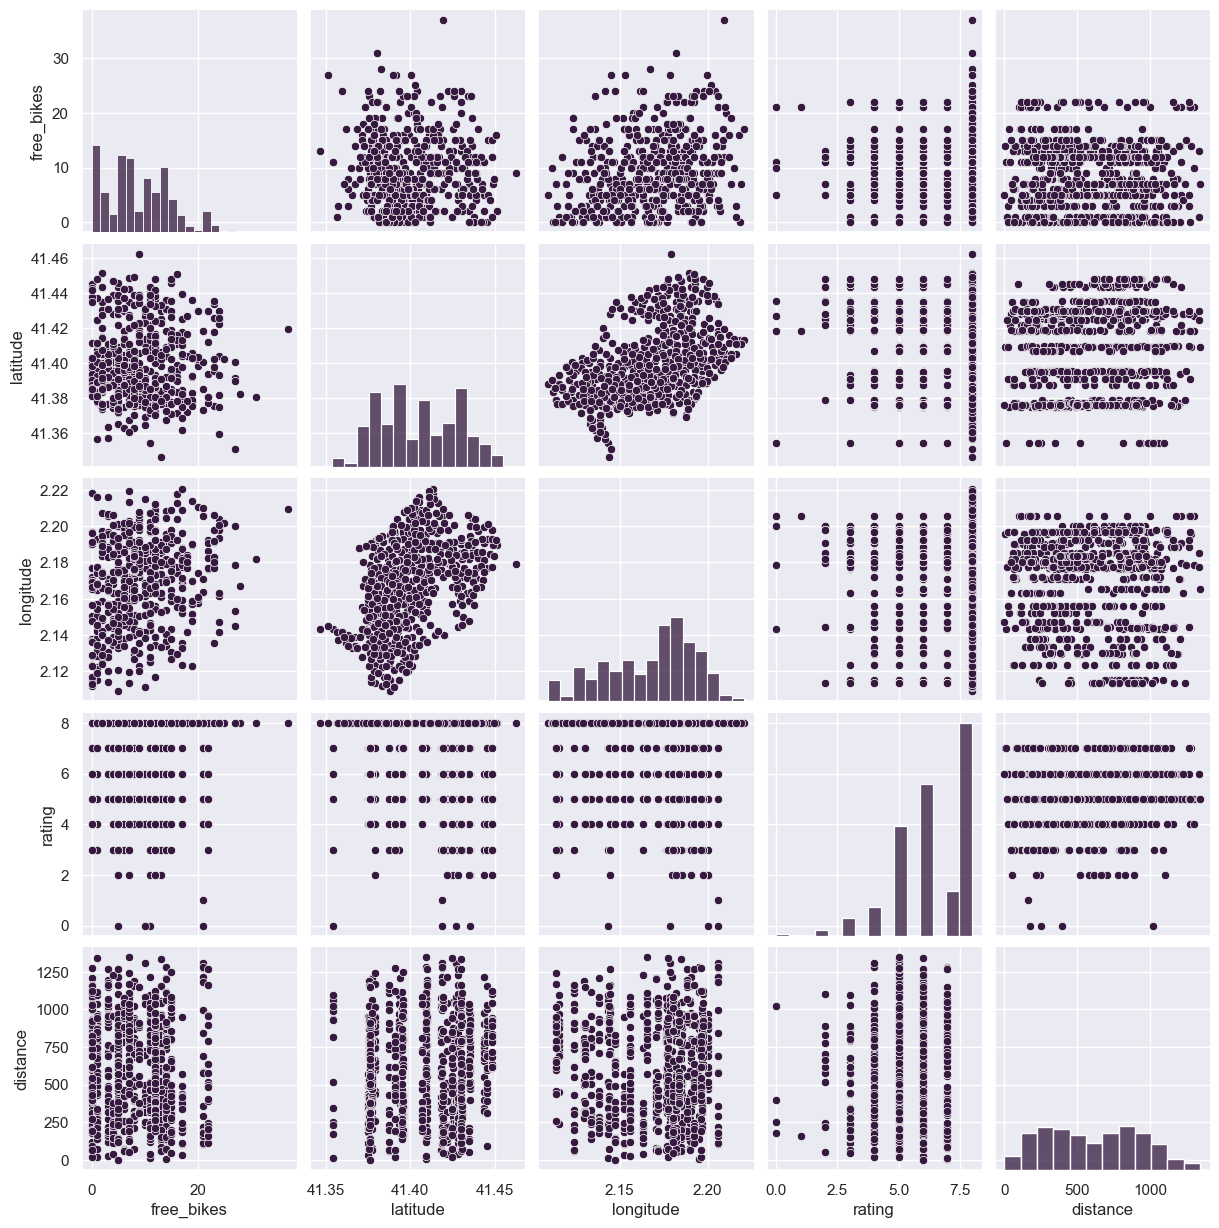

In [34]:
sns.pairplot(full_df)

plt.savefig('../images/full_df_pairgrid.svg')
plt.show()

In [38]:
## Creating a histogram for the num of free bikes 
grouped_by_station = full_df[['station_id','free_bikes','rating', 'distance']].groupby(by='station_id').mean()

FileNotFoundError: [Errno 2] No such file or directory: '../images/grouped_by_station_hist1.svg'

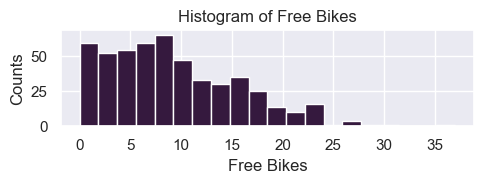

In [39]:
fig, ax = plt.subplots(figsize=(5,2))
ax.hist(grouped_by_station['free_bikes'], bins=20)
ax.set_title('Histogram of Free Bikes')
ax.set_xlabel('Free Bikes')
ax.set_ylabel('Counts')

plt.tight_layout()

plt.savefig('../images/grouped_by_station_hist1.svg')

plt.show()


In [40]:
grouped_by_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 00028670e3d01438515caba403ffd680 to ffbaa273abd20a25367fc85ccfd7330c
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   free_bikes  507 non-null    float64
 1   rating      507 non-null    float64
 2   distance    40 non-null     float64
dtypes: float64(3)
memory usage: 15.8+ KB


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [41]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [42]:
connection = create_connection("../data/barcelona_bikes_data.sqlite")

Connection to SQLite DB successful


Look at the data before and after the join to validate your data.

In [43]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [44]:
bike_stations_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 19 to 24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   free_bikes  507 non-null    int64  
 1   station_id  507 non-null    object 
 2   latitude    507 non-null    float64
 3   longitude   507 non-null    float64
 4   name        507 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 23.8+ KB


In [48]:
## Create a table for bike_stations_data2 

create_bike_stations_data2_table = """
CREATE TABLE IF NOT EXISTS bike_stations_barcelona (
  free_bikes INTEGER,
  station_id TEXT NOT NULL PRIMARY KEY,
  latitude FLOAT,
  longitude FLOAT,
  name TEXT
);
"""

In [49]:
## Executing above query 
execute_query(connection, create_bike_stations_data2_table)

Query executed successfully


In [50]:
yelp_poi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 0 to 19
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poi_id        792 non-null    object 
 1   name          792 non-null    object 
 2   rating        792 non-null    float64
 3   distance      792 non-null    float64
 4   full_address  792 non-null    object 
 5   station_id    792 non-null    object 
dtypes: float64(2), object(4)
memory usage: 43.3+ KB


In [51]:
create_yelp_poi_table = """
CREATE TABLE IF NOT EXISTS yelp_poi_barcelona (
  poi_id TEXT,
  name TEXT,
  rating FLOAT,
  distance FLOAT,
  full_address TEXT,
  station_id TEXT,
  FOREIGN KEY (station_id) REFERENCES bike_stations_barcelona (station_id)
);
"""

In [52]:
execute_query(connection, create_yelp_poi_table)

Query executed successfully


In [53]:
## Connecting to SQL 
bike_stations_data2.to_sql('bike_stations_barcelona', connection, if_exists='replace')

507

In [54]:
yelp_poi.to_sql('yelp_poi_barcelona', connection, if_exists='replace')

792

In [55]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [57]:
## Querying from bike_stations_data2 table 
select_stations = "SELECT * from bike_stations_barcelona limit 10"
bike_stations_data2_table = execute_read_query(connection, select_stations)

for station in bike_stations_data2_table:
    print(station)

(19, 13, 'dedcd93fbe85671e73c79baf58bd7fed', 41.4253643, 2.1852073, 'C/ CARDENAL TEDESCHINI, 13')
(12, 13, '5c10c2dba1c5a8e8d9dcbb251fd8eab7', 41.4299999, 2.190246, "RAMBLA DE L'ONZE DE SETEMBRE, 69")
(19, 5, 'f1aaf083aaa04498aad975bc45bdc089', 41.4433647, 2.1906302, 'PG. TORRAS I BAGES, 129')
(4, 14, '4a30020e6926a2ba39f88be0f6bba5cb', 41.3775319, 2.1707321, 'C/ SANT OLEGUER, 2')
(8, 17, 'e964297fbcd2fc96bb6632e5a530d0df', 41.3751161, 2.1523091, 'AV. PARAL.LEL, 194')
(17, 14, '77e6513f3a43c3054c71144be4132e59', 41.4090202, 2.1954152, 'C/ BILBAO, 174')
(18, 6, '23b6f7550b25fbd13f67b32e2bbde1e1', 41.4180789, 2.1763994, "C/ D'ESCORNALBOU, 51")
(20, 0, 'a38652efcd560833b66a90c618ec85c7', 41.3939378, 2.1380304, 'C/ GANDUXER, 29')
(23, 3, 'ab5aed96eeda51ba68ab88cfeb6d6201', 41.4092333, 2.1557747, 'C/ MASSENS, 76')
(18, 8, '614ca4a84009c33664c8489c909264f4', 41.3754188, 2.1297823, 'C/ FELIU DE CASANOVA, 1')


In [58]:
## Querying from yelp_poi table 
select_poi = "SELECT * from yelp_poi_barcelona limit 10"
yelp_poi_table = execute_read_query(connection, select_poi)

for poi in yelp_poi_table:
    print(poi)

(0, 'oD9g3jw6UoebuiI3GtSGww', 'Tasca I Vins', 4.0, 191.5571791168666, "['Calle Cardenal Tedeschini, 32', '08027 Barcelona', 'Spain']", 'dedcd93fbe85671e73c79baf58bd7fed')
(1, 'J1vHLZvSRfkNpy2x8OuVaQ', 'Torre Rosa', 4.0, 501.2362744703168, "['Carrer de Francesc Tàrrega, 22', '08027 Barcelona', 'Spain']", 'dedcd93fbe85671e73c79baf58bd7fed')
(2, 'iRrsa0bQbTtHzBjsHIprqQ', 'Beering Barcelona', 4.5, 828.625543250274, "['Carrer de las Navas de Tolosa, 355', '08041 Barcelona', 'Spain']", 'dedcd93fbe85671e73c79baf58bd7fed')
(3, 'UdRmo2dstOYd29Ihs5vI8w', 'La Vermuteria de Sant Andreu', 4.0, 508.5732805745537, "['Rambla de Fabra I Puig, 51', '08030 Barcelona', 'Spain']", 'dedcd93fbe85671e73c79baf58bd7fed')
(4, 'e6bRub-8J0j5PDm55UNASA', 'Toca Teca', 4.5, 395.7349066197343, "['Carrer Garcilaso, 172', '08027 Barcelona', 'Spain']", 'dedcd93fbe85671e73c79baf58bd7fed')
(5, 'SnNRwGBCEzw4Jg3O6FKY_g', 'La Paradeta Meridiana', 4.0, 222.6300713471383, "['Carrer Pacific, 74', '08027 Barcelona', 'Spain']", 'd

In [59]:
# Checking if the merged data worked 
print('Diff of number of bike stations:', bike_stations_data2.shape[0] - len(full_df['station_id'].unique()))

print('Diff of number of POI:', yelp_poi.shape[0] - full_df.shape[0])

Diff of number of bike stations: 0
Diff of number of POI: -467


In [60]:
## Retrieving info of Dataframe
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   free_bikes    1259 non-null   int64  
 1   station_id    1259 non-null   object 
 2   latitude      1259 non-null   float64
 3   longitude     1259 non-null   float64
 4   station_name  1259 non-null   object 
 5   poi_id        792 non-null    object 
 6   poi_name      792 non-null    object 
 7   rating        1259 non-null   int8   
 8   distance      792 non-null    float64
 9   full_address  792 non-null    object 
dtypes: float64(3), int64(1), int8(1), object(5)
memory usage: 89.9+ KB


In [61]:
# Identify the points of interest that are null
full_df[full_df['poi_id'].isnull()]

,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,rating,distance,full_address
792,11,6627cf97075521a6295e0364ae4d4e7f,41.436671,2.186105,"C/ MALATS, 98-100",NaN,NaN,8,NaN,NaN
793,24,408725c15ad93ef162f0e92a0cfec7d1,41.403890,2.204114,"C/ LOPE DE VEGA, 79",NaN,NaN,8,NaN,NaN
794,7,9a7b57a18c273d1722a143bdefa072ce,41.403153,2.144584,"C/ SANT HERMENEGILD, 30",NaN,NaN,8,NaN,NaN
795,11,614fa4d6943058d43722dc81a0564c6c,41.439929,2.197069,"C/REPÚBLICA DOMINICANA,25(CENTRE COMERCIAL)",NaN,NaN,8,NaN,NaN
796,7,2aff2ad9ec4b1b84d6abd6492da2e4e6,41.393489,2.170742,"C/ BRUC, 66",NaN,NaN,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1254,24,9236b6b2cd0af13747bef6610bc2815c,41.425663,2.200863,"RAMBLA DE PRIM, 256",NaN,NaN,8,NaN,NaN
1255,1,3dc0ced3eb7d74f753eff203d02d79cd,41.411763,2.145342,"C/ ARGENTERA, 23",NaN,NaN,8,NaN,NaN
1256,8,f131c8be74d689e7349af47724d88348,41.380393,2.160651,"C/ COMTE URGELL, 23",NaN,NaN,8,NaN,NaN
1257,15,9197b4871b9c31693dd4f6f37b716a57,41.391429,2.180569,"PG. LLUIS COMPANYS, 18 (ARC TRIOMF)",NaN,NaN,8,NaN,NaN


Using SQL, I put all the results from both datasets "bike_stations_data2" and "yelp_poi". In doing so, this is another way to retrieve information from both datasets. 